# water depth 6-4-6 -fixed speed&power-fuel&emission

### slightly restricted waterway: h=6m(distance100km),4m(distance100km),6m(distance100km), total distance=300km; max loading with actual draft= 3.5m, payload=2500ton(full)
### Same vessel:  M8, L* B * T=110* 11.4* 3.5, DWT=3000ton; construction year=1990
### assume that the ship maintains constant speed to water 
     V=3m/s(h=6m,P=274kW;h=4m, P=307kW), 
     V=3.5m/s(h=6m,P=396kW;h=4m, P=507kW)
     V=4m/s(h=6m,P=647kW;h=4m, P=1153kW)
### or maintain constant power: 
    P=647kW(h=6m,V=4m/s;h=4m,V=3.674m/s),
    P=396kW(h=6m,V=3.5m/s;h=4m,V=3.28m/s),
    P=274kW(h=6m,V=3m/s;h=4m,V=2.85m/s),
### figure output:
    water depth & actrual draft 
    payload
    diesel consumption (kg/km),
    emission rate (g/km),



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math 

Text(0.5, 0, 'distance (km)')

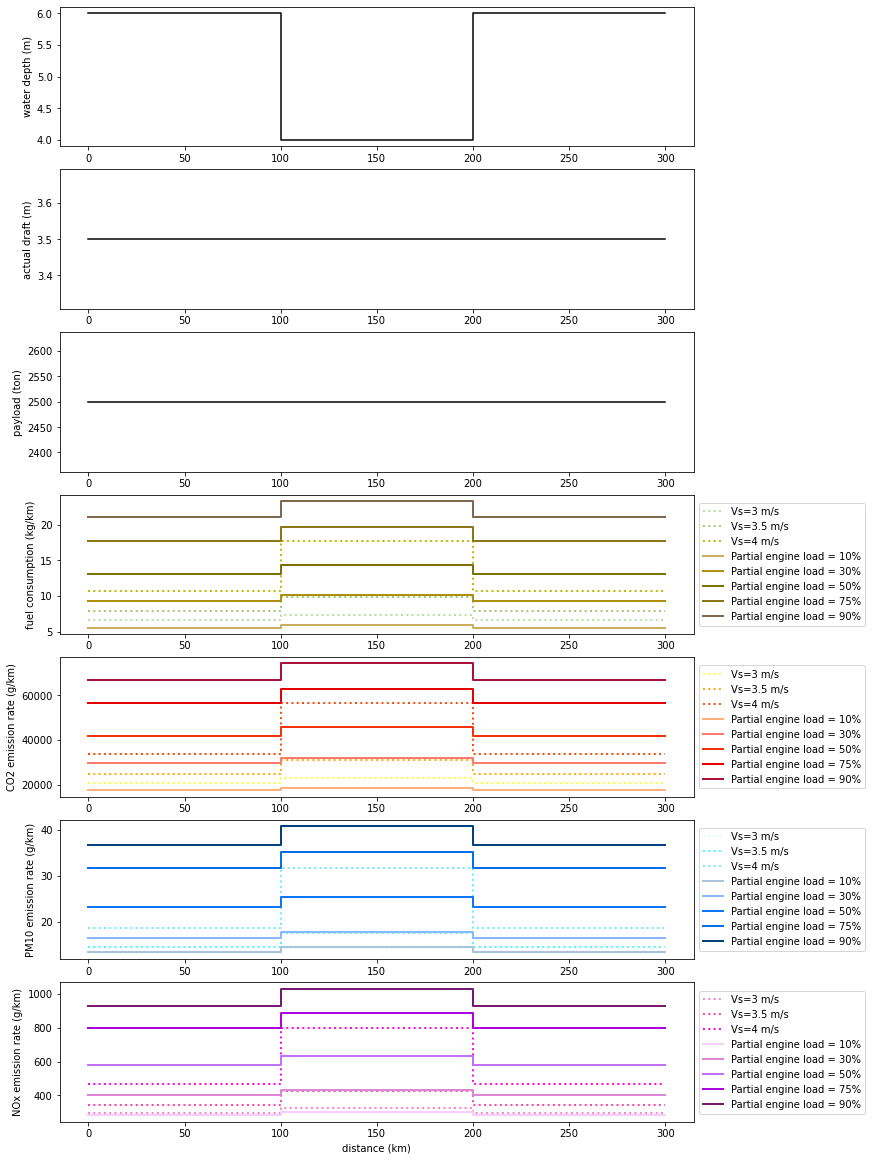

In [2]:
fig, axs = plt.subplots(7, 1, figsize=(12, 16), constrained_layout=True)
fontsize=15
plt.subplot(711)

dist=([0,100,100,200,200,300])
h=([6,6,4,4,6,6])
plt.plot(dist, h,'k')
plt.ylabel('water depth (m)')

plt.subplot(712)
dist=([0,100,100,200,200,300])
adft=([3.5,3.5,3.5,3.5,3.5,3.5])
plt.plot(dist, adft,'k')
plt.ylabel('actual draft (m)')

plt.subplot(713)
dist=([0,100,100,200,200,300])
payload=([2500,2500,2500,2500,2500,2500])
plt.plot(dist, payload,'k')
plt.ylabel('payload (ton)')

ax=plt.subplot(714)
dist=([0,100,100,200,200,300])
diesel_v1=([6.57,6.57,7.29,7.29,6.57,6.57,])
diesel_v2=([7.88,7.88,9.87,9.87,7.88,7.88,])
diesel_v3=([10.7,10.7,17.79,17.79,10.7,10.7,])
#diesel_v4=([17.64,17.64,45.3,45.3,17.64,17.64,])  # when h=4, v4 is not exist, because the vessel speed to water can't reach 4.5m/s
diesel_pr1=([5.54,5.54,5.86,5.86,5.54,5.54,])
diesel_pr2=([9.36,9.36,10.09,10.09,9.36,9.36,])
diesel_pr3=([13.12,13.12,14.38,14.38,13.12,13.12,])
diesel_pr4=([17.8,17.8,19.74,19.74,17.8,17.8,])
diesel_pr5=([21.05,21.05,23.39,23.39,21.05,21.05,])
plt.plot(dist, diesel_v1,':',color='#b7e1a1',linewidth='2',label='Vs=3 m/s')
plt.plot(dist, diesel_v2,':',color='#a6c875',linewidth='2',label='Vs=3.5 m/s')
plt.plot(dist, diesel_v3,':',color='#c2b709',linewidth='2',label='Vs=4 m/s')
#plt.plot(dist, diesel_v4,':',color='#9bb53c',linewidth='2.5',label='Vs=4.5 m/s')
plt.plot(dist, diesel_pr1,color='#ccad60',linewidth='2',label='Partial engine load = 10%')
plt.plot(dist, diesel_pr2,color='#ad900d',linewidth='2',label='Partial engine load = 30%')
plt.plot(dist, diesel_pr3,color='#7d7103',linewidth='2',label='Partial engine load = 50%')
plt.plot(dist, diesel_pr4,color='#8e7618',linewidth='2',label='Partial engine load = 75%')
plt.plot(dist, diesel_pr5,color='#7f684e',linewidth='2',label='Partial engine load = 90%')
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('fuel consumption (kg/km)')

ax=plt.subplot(715)
dist=([0,100,100,200,200,300])
EMrCO2_v1=([20836,20836,23122,23122,20836,20836,])
EMrCO2_v2=([25011,25011,31315,31315,25011,25011,])
EMrCO2_v3=([33956,33956,56450,56450,33956,33956,])
#EMrCO2_v4=([55973,55973,143728,143728,55973,55973,]) # when h=4, v4 is not exist, becausethe vessel speed to water can't reach 4.5m/s
EMrCO2_pr1=([17563,17563,18600,18600,17563,17563,])
EMrCO2_pr2=([29696,29696,32002,32002,29696,29696,])
EMrCO2_pr3=([41642,41642,45635,45635,41642,41642,])
EMrCO2_pr4=([56483,56483,62642,62642,56483,56483,])
EMrCO2_pr5=([66773,66773,74195,74195,66773,66773,])
plt.plot(dist, EMrCO2_v1,':',color='#fffd37',linewidth='2',label='Vs=3 m/s')
plt.plot(dist, EMrCO2_v2,':',color='#ffab0f',linewidth='2',label='Vs=3.5 m/s')
plt.plot(dist, EMrCO2_v3,':',color='#fe4b03',linewidth='2',label='Vs=4 m/s')
#plt.plot(dist, EMrCO2_v4,':',color='#ff724c',linewidth='2.5',label='Vs=4.5 m/s')
plt.plot(dist, EMrCO2_pr1,color='#ffb07c',linewidth='2',label='Partial engine load = 10%')
plt.plot(dist, EMrCO2_pr2,color='#ff796c',linewidth='2',label='Partial engine load = 30%')
plt.plot(dist, EMrCO2_pr3,color='#f4320c',linewidth='2',label='Partial engine load = 50%')
plt.plot(dist, EMrCO2_pr4,color='#e50000',linewidth='2',label='Partial engine load = 75%')
plt.plot(dist, EMrCO2_pr5,color='#ab1239',linewidth='2',label='Partial engine load = 90%')
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('CO2 emission rate (g/km)')

ax=plt.subplot(716)
dist=([0,100,100,200,200,300])
EMrPM10_v1=([13.23,13.23,14.26,14.26,13.23,13.23,])
EMrPM10_v2=([14.5,14.5,17.53,17.53,14.5,14.5,])
EMrPM10_v3=([18.74,18.74,31.71,31.71,18.74,18.74,])
# EMrPM10_v4=([7.8,7.8,7.8,7.8,7.8,7.8,]) # when h=4, v4 is not exist, becausethe vessel speed to water can't reach 4.5m/s
EMrPM10_pr1=([13.53,13.53,14.41,14.41,13.53,13.53,])
EMrPM10_pr2=([16.56,16.56,17.85,17.85,16.56,16.56,])
EMrPM10_pr3=([23.17,23.17,25.39,25.39,23.17,23.17,])
EMrPM10_pr4=([31.72,31.72,35.18,35.18,31.72,31.72,])
EMrPM10_pr5=([36.75,36.75,40.84,40.84,36.75,36.75,])
plt.plot(dist, EMrPM10_v1,':',color='#d4ffff',linewidth='2',label='Vs=3 m/s')
plt.plot(dist, EMrPM10_v2,':',color='#41fdfe',linewidth='2',label='Vs=3.5 m/s')
plt.plot(dist, EMrPM10_v3,':',color='#6dedfd',linewidth='2',label='Vs=4 m/s')
#plt.plot(dist, EMrPM10_v4,':',color='#02ccfe',linewidth='2.5',label='Vs=4.5 m/s')
plt.plot(dist, EMrPM10_pr1,color='#acc2d9',linewidth='2',label='Partial engine load = 10%')
plt.plot(dist, EMrPM10_pr2,color='#8ab8fe',linewidth='2',label='Partial engine load = 30%')
plt.plot(dist, EMrPM10_pr3,color='#0d75f8',linewidth='2',label='Partial engine load = 50%')
plt.plot(dist, EMrPM10_pr4,color='#056eee',linewidth='2',label='Partial engine load = 75%')
plt.plot(dist, EMrPM10_pr5,color='#014182',linewidth='2',label='Partial engine load = 90%')
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('PM10 emission rate (g/km)')

ax=plt.subplot(717)
dist=([0,100,100,200,200,300])
EMrNOx_v1=([297.57,297.57,325.83,325.83,297.57,297.57,])
EMrNOx_v2=([342.67,342.67,424.65,424.65,342.67,342.67,])
EMrNOx_v3=([465.91,465.91,799.22,799.22,465.91,465.91,])
#EMrNOx_v4=([7.8,7.8,7.8,7.8,7.8,7.8,])# when h=4, v4 is not exist, becausethe vessel speed to water can't reach 4.5m/s
EMrNOx_pr1=([281.12,281.12,298.76,298.76,281.12,281.12,])
EMrNOx_pr2=([402.63,402.63,433.87,433.87,402.63,402.63,])
EMrNOx_pr3=([579.38,579.38,634.95,634.95,579.38,579.38,])
EMrNOx_pr4=([800.89,800.89,888.21,888.21,800.89,800.89,])
EMrNOx_pr5=([927.88,927.88,1031.23,1031.23,927.88,927.88,])
plt.plot(dist, EMrNOx_v1,':',color='#fe83cc',linewidth='2',label='Vs=3 m/s')
plt.plot(dist, EMrNOx_v2,':',color='#fe46a5',linewidth='2',label='Vs=3.5 m/s')
plt.plot(dist, EMrNOx_v3,':',color='#ff08e8',linewidth='2',label='Vs=4 m/s')
#plt.plot(dist, EMrNOx_v4,':',color='#fe02a2',linewidth='2.5',label='Vs=4.5 m/s')
plt.plot(dist, EMrNOx_pr1,color='#f6cefc',linewidth='2',label='Partial engine load = 10%')
plt.plot(dist, EMrNOx_pr2,color='#dd85d7',linewidth='2',label='Partial engine load = 30%')
plt.plot(dist, EMrNOx_pr3,color='#c071fe',linewidth='2',label='Partial engine load = 50%')
plt.plot(dist, EMrNOx_pr4,color='#ad03de',linewidth='2',label='Partial engine load = 75%')
plt.plot(dist, EMrNOx_pr5,color='#751973',linewidth='2',label='Partial engine load = 90%')
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('NOx emission rate (g/km)')
plt.xlabel('distance (km)')



(0.0, 1200.0)

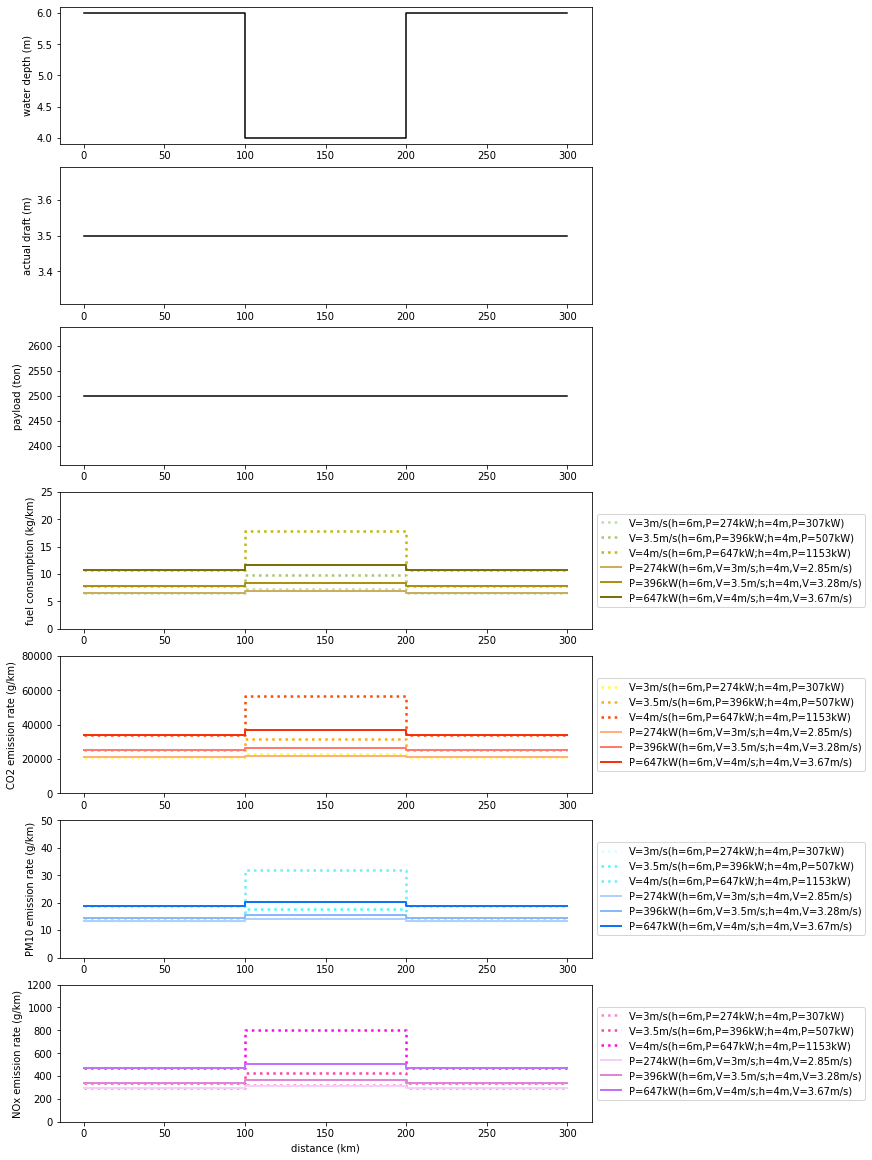

In [2]:
fig, axs = plt.subplots(7, 1, figsize=(12, 16), constrained_layout=True)
fontsize=15
plt.subplot(711)

dist=([0,100,100,200,200,300])
h=([6,6,4,4,6,6])
plt.plot(dist, h,'k')
plt.ylabel('water depth (m)')

plt.subplot(712)
dist=([0,100,100,200,200,300])
adft=([3.5,3.5,3.5,3.5,3.5,3.5])
plt.plot(dist, adft,'k')
plt.ylabel('actual draft (m)')

plt.subplot(713)
dist=([0,100,100,200,200,300])
payload=([2500,2500,2500,2500,2500,2500])
plt.plot(dist, payload,'k')
plt.ylabel('payload (ton)')

ax=plt.subplot(714)
dist=([0,100,100,200,200,300])
diesel_fv1=([6.57,6.57,7.29,7.29,6.57,6.57,])
diesel_fv2=([7.88,7.88,9.87,9.87,7.88,7.88,])
diesel_fv3=([10.7,10.7,17.79,17.79,10.7,10.7,])
#diesel_v4=([17.64,17.64,45.3,45.3,17.64,17.64,])  # when h=4, v4 is not exist, because the vessel speed to water can't reach 4.5m/s
diesel_fp1=([6.57,6.57,6.89,6.89,6.57,6.57,])
diesel_fp2=([7.88,7.88,8.39,8.39,7.88,7.88,])
diesel_fp3=([10.7,10.7,11.65,11.65,10.7,10.7])

plt.plot(dist, diesel_fv1,':',color='#b7e1a1',linewidth='2.5',label='V=3m/s(h=6m,P=274kW;h=4m,P=307kW)')
plt.plot(dist, diesel_fv2,':',color='#a6c875',linewidth='2.5',label='V=3.5m/s(h=6m,P=396kW;h=4m,P=507kW)')
plt.plot(dist, diesel_fv3,':',color='#c2b709',linewidth='2.5',label='V=4m/s(h=6m,P=647kW;h=4m,P=1153kW)')
#plt.plot(dist, diesel_v4,':',color='#9bb53c',linewidth='2.5',label='Vs=4.5 m/s')
plt.plot(dist, diesel_fp1,color='#ccad60',linewidth='2',label='P=274kW(h=6m,V=3m/s;h=4m,V=2.85m/s)')
plt.plot(dist, diesel_fp2,color='#ad900d',linewidth='2',label='P=396kW(h=6m,V=3.5m/s;h=4m,V=3.28m/s)')
plt.plot(dist, diesel_fp3,color='#7d7103',linewidth='2',label='P=647kW(h=6m,V=4m/s;h=4m,V=3.67m/s)')
# plt.plot(dist, diesel_pr4,color='#8e7618',linewidth='2',label='Partial engine load = 75%')
# plt.plot(dist, diesel_pr5,color='#7f684e',linewidth='2',label='Partial engine load = 90%')
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('fuel consumption (kg/km)')
plt.ylim(0, 25)

ax=plt.subplot(715)
dist=([0,100,100,200,200,300])
EMrCO2_fv1=([20836,20836,23122,23122,20836,20836,])
EMrCO2_fv2=([25011,25011,31315,31315,25011,25011,])
EMrCO2_fv3=([33956,33956,56450,56450,33956,33956,])
#EMrCO2_v4=([55973,55973,143728,143728,55973,55973,]) # when h=4, v4 is not exist, becausethe vessel speed to water can't reach 4.5m/s
EMrCO2_fp1=([20836,20836,21874,21874,20836,20836,])
EMrCO2_fp2=([25011,25011,26635,26635,25011,25011,])
EMrCO2_fp3=([33956,33956,36969,36969,33956,33956,])

plt.plot(dist, EMrCO2_fv1,':',color='#fffd37',linewidth='2.5',label='V=3m/s(h=6m,P=274kW;h=4m,P=307kW)')
plt.plot(dist, EMrCO2_fv2,':',color='#ffab0f',linewidth='2.5',label='V=3.5m/s(h=6m,P=396kW;h=4m,P=507kW)')
plt.plot(dist, EMrCO2_fv3,':',color='#fe4b03',linewidth='2.5',label='V=4m/s(h=6m,P=647kW;h=4m,P=1153kW)')
#plt.plot(dist, EMrCO2_v4,':',color='#ff724c',linewidth='2.5',label='Vs=4.5 m/s')
plt.plot(dist, EMrCO2_fp1,color='#ffb07c',linewidth='2',label='P=274kW(h=6m,V=3m/s;h=4m,V=2.85m/s)')
plt.plot(dist, EMrCO2_fp2,color='#ff796c',linewidth='2',label='P=396kW(h=6m,V=3.5m/s;h=4m,V=3.28m/s)')
plt.plot(dist, EMrCO2_fp3,color='#f4320c',linewidth='2',label='P=647kW(h=6m,V=4m/s;h=4m,V=3.67m/s)')
# plt.plot(dist, EMrCO2_pr4,color='#e50000',linewidth='2',label='Partial engine load = 75%')
# plt.plot(dist, EMrCO2_pr5,color='#ab1239',linewidth='2',label='Partial engine load = 90%')
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('CO2 emission rate (g/km)')
plt.ylim(0, 80000)

ax=plt.subplot(716)
dist=([0,100,100,200,200,300])
EMrPM10_fv1=([13.23,13.23,14.26,14.26,13.23,13.23,])
EMrPM10_fv2=([14.5,14.5,17.53,17.53,14.5,14.5,])
EMrPM10_fv3=([18.74,18.74,31.71,31.71,18.74,18.74,])
# EMrPM10_v4=([7.8,7.8,7.8,7.8,7.8,7.8,]) # when h=4, v4 is not exist, becausethe vessel speed to water can't reach 4.5m/s
EMrPM10_fp1=([13.23,13.23,13.9,13.9,13.23,13.23,])
EMrPM10_fp2=([14.5,14.5,15.45,15.45,14.5,14.5,])
EMrPM10_fp3=([18.74,18.74,20.4,20.4,18.74,18.74,])
plt.plot(dist, EMrPM10_fv1,':',color='#d4ffff',linewidth='2.5',label='V=3m/s(h=6m,P=274kW;h=4m,P=307kW)')
plt.plot(dist, EMrPM10_fv2,':',color='#41fdfe',linewidth='2.5',label='V=3.5m/s(h=6m,P=396kW;h=4m,P=507kW)')
plt.plot(dist, EMrPM10_fv3,':',color='#6dedfd',linewidth='2.5',label='V=4m/s(h=6m,P=647kW;h=4m,P=1153kW)')
#plt.plot(dist, EMrPM10_v4,':',color='#02ccfe',linewidth='2.5',label='Vs=4.5 m/s')
plt.plot(dist, EMrPM10_fp1,color='#b1d1fc',linewidth='2',label='P=274kW(h=6m,V=3m/s;h=4m,V=2.85m/s)')
plt.plot(dist, EMrPM10_fp2,color='#8ab8fe',linewidth='2',label='P=396kW(h=6m,V=3.5m/s;h=4m,V=3.28m/s)')
plt.plot(dist, EMrPM10_fp3,color='#0d75f8',linewidth='2',label='P=647kW(h=6m,V=4m/s;h=4m,V=3.67m/s)')
# plt.plot(dist, EMrPM10_pr4,color='#056eee',linewidth='2',label='Partial engine load = 75%')
# plt.plot(dist, EMrPM10_pr5,color='#014182',linewidth='2',label='Partial engine load = 90%')
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('PM10 emission rate (g/km)')
plt.ylim(0, 50)

ax=plt.subplot(717)
dist=([0,100,100,200,200,300])
EMrNOx_fv1=([297.57,297.57,325.83,325.83,297.57,297.57,])
EMrNOx_fv2=([342.67,342.67,424.65,424.65,342.67,342.67,])
EMrNOx_fv3=([465.91,465.91,799.22,799.22,465.91,465.91,])
#EMrNOx_v4=([7.8,7.8,7.8,7.8,7.8,7.8,])# when h=4, v4 is not exist, becausethe vessel speed to water can't reach 4.5m/s
EMrNOx_fp1=([297.57,297.57,312.49,312.49,297.57,297.57,])
EMrNOx_fp2=([342.67,342.67,364.99,364.99,342.67,342.67,])
EMrNOx_fp3=([465.91,465.91,507.25,507.25,465.91,465.91,])
plt.plot(dist, EMrNOx_fv1,':',color='#fe83cc',linewidth='2.5',label='V=3m/s(h=6m,P=274kW;h=4m,P=307kW)')
plt.plot(dist, EMrNOx_fv2,':',color='#fe46a5',linewidth='2.5',label='V=3.5m/s(h=6m,P=396kW;h=4m,P=507kW)')
plt.plot(dist, EMrNOx_fv3,':',color='#ff08e8',linewidth='2.5',label='V=4m/s(h=6m,P=647kW;h=4m,P=1153kW)')
#plt.plot(dist, EMrNOx_v4,':',color='#fe02a2',linewidth='2.5',label='Vs=4.5 m/s')
plt.plot(dist, EMrNOx_fp1,color='#f6cefc',linewidth='2',label='P=274kW(h=6m,V=3m/s;h=4m,V=2.85m/s)')
plt.plot(dist, EMrNOx_fp2,color='#dd85d7',linewidth='2',label='P=396kW(h=6m,V=3.5m/s;h=4m,V=3.28m/s)')
plt.plot(dist, EMrNOx_fp3,color='#c071fe',linewidth='2',label='P=647kW(h=6m,V=4m/s;h=4m,V=3.67m/s)')
# plt.plot(dist, EMrNOx_pr4,color='#ad03de',linewidth='2',label='Partial engine load = 75%')
# plt.plot(dist, EMrNOx_pr5,color='#751973',linewidth='2',label='Partial engine load = 90%')
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('NOx emission rate (g/km)')
plt.xlabel('distance (km)')
plt.ylim(0, 1200)
